<a href="https://colab.research.google.com/github/warrenshiv/CalCOFI_Data_Analysis/blob/main/Ass_Part2_Task4_Multiple_Regression_FirstNameLastName.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Name:
# Last Name:

# Import Libraries  

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Import Data

In [30]:
df = pd.read_csv(r'/content/bottle.csv', low_memory=False)
pd.set_option('display.float_format', lambda x: '%f' % x)

# Data management

In [31]:
# Select the variables and drop rows with missing values
variables = ['T_degC', 'Salnty', 'O2ml_L', 'PO4uM']
df = df.dropna(subset=variables)

In [32]:
# Define response variable and explanatory variables
Y = df['T_degC']
X1 = df[['Salnty', 'O2ml_L', 'PO4uM']]
X2 = df[['Salnty', 'O2ml_L']]
X3 = df[['Salnty', 'PO4uM']]
X4 = df[['O2ml_L', 'PO4uM']]

# Correlation between each explantory variable and response variable

In [33]:
corr_matrix = df[variables].corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
           T_degC    Salnty    O2ml_L     PO4uM
T_degC  1.000000 -0.474276  0.784405 -0.891543
Salnty -0.474276  1.000000 -0.800442  0.716211
O2ml_L  0.784405 -0.800442  1.000000 -0.949794
PO4uM  -0.891543  0.716211 -0.949794  1.000000


# Scatter plot between each explantory variable and response variable

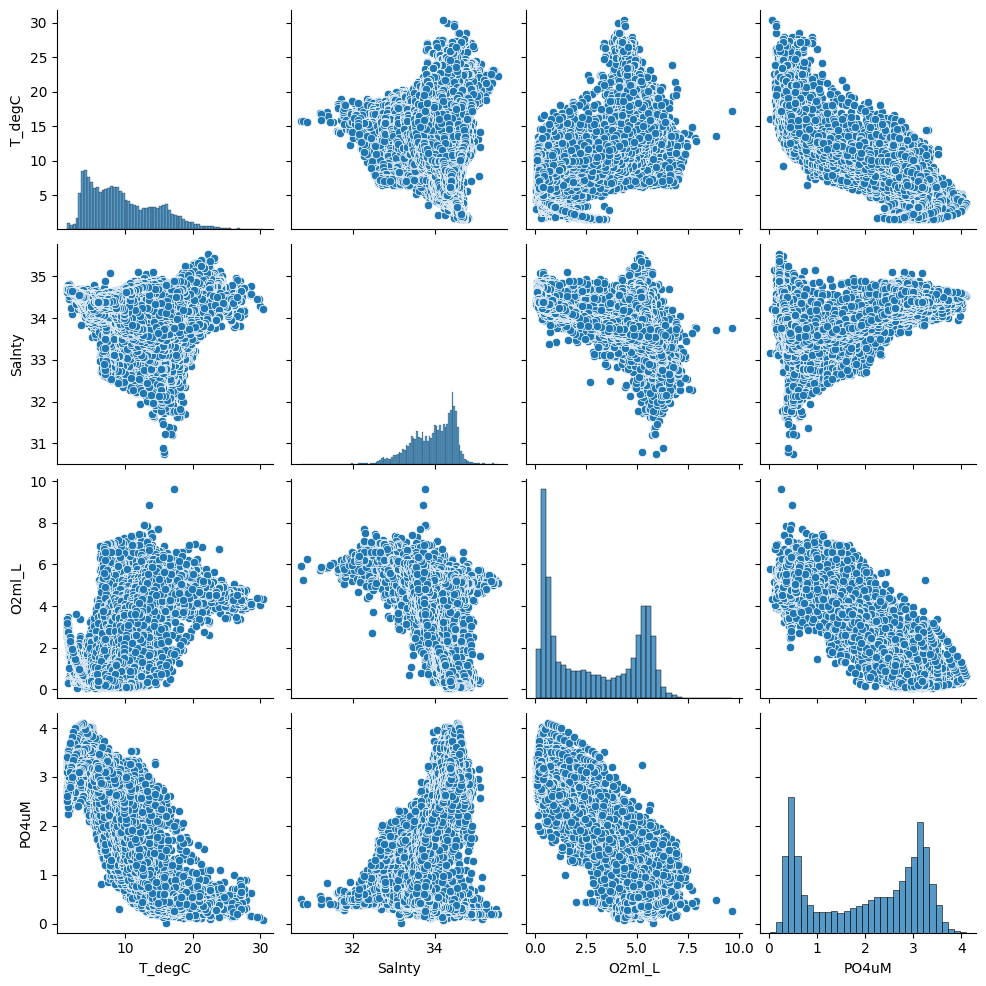

In [34]:
sns.pairplot(df[variables])
plt.show()

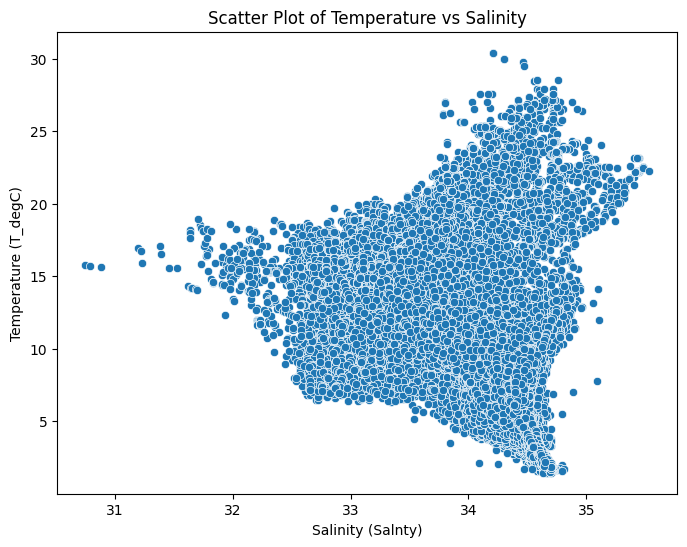

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Salnty', y='T_degC', data=df)
plt.title('Scatter Plot of Temperature vs Salinity')
plt.xlabel('Salinity (Salnty)')
plt.ylabel('Temperature (T_degC)')
plt.show()


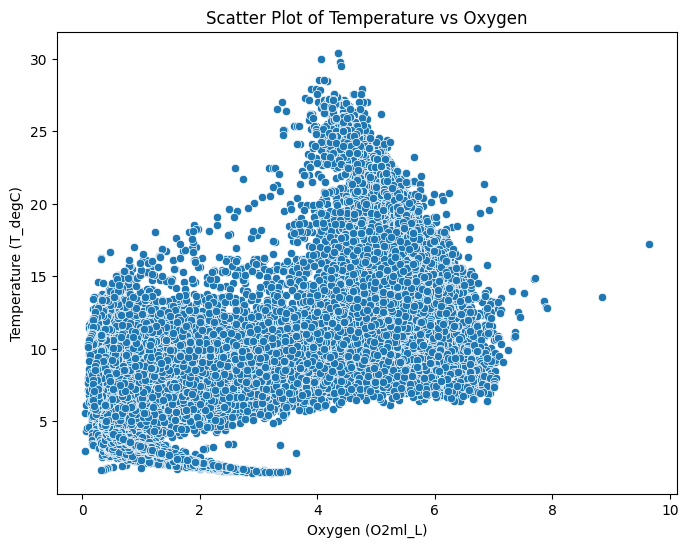

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='O2ml_L', y='T_degC', data=df)
plt.title('Scatter Plot of Temperature vs Oxygen')
plt.xlabel('Oxygen (O2ml_L)')
plt.ylabel('Temperature (T_degC)')
plt.show()


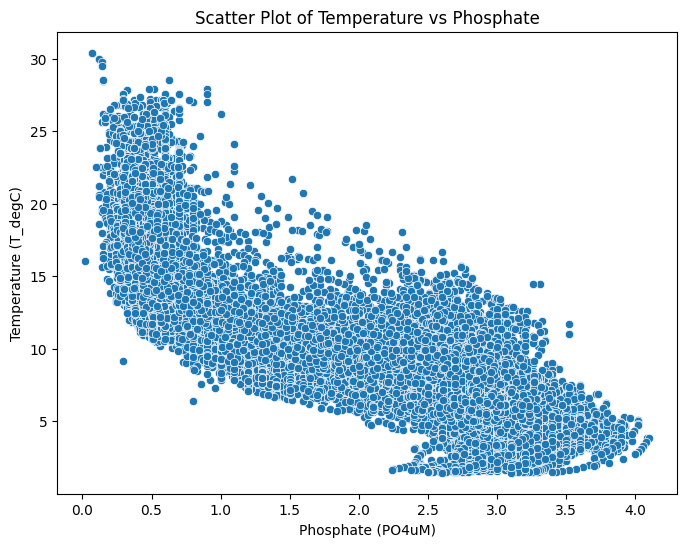

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PO4uM', y='T_degC', data=df)
plt.title('Scatter Plot of Temperature vs Phosphate')
plt.xlabel('Phosphate (PO4uM)')
plt.ylabel('Temperature (T_degC)')
plt.show()


# Regression Analysis for each candidate

In [38]:
def multiple_regression(X, Y):
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(Y, X).fit()
    print(model.summary())
    return model

In [39]:
# Perform multiple regression for each combination
print("Model 1: T_degC ~ Salnty + O2ml_L + PO4uM")
model1 = multiple_regression(X1, Y)

Model 1: T_degC ~ Salnty + O2ml_L + PO4uM
                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 9.866e+04
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:46:39   Log-Likelihood:            -1.0180e+05
No. Observations:               49293   AIC:                         2.036e+05
Df Residuals:                   49289   BIC:                         2.037e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

In [40]:
print("\nModel 2: T_degC ~ Salnty + O2ml_L")
model2 = multiple_regression(X2, Y)


Model 2: T_degC ~ Salnty + O2ml_L
                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 5.260e+04
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:46:39   Log-Likelihood:            -1.2162e+05
No. Observations:               49293   AIC:                         2.433e+05
Df Residuals:                   49290   BIC:                         2.433e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -140.

In [41]:
print("\nModel 3: T_degC ~ Salnty + PO4uM")
model3 = multiple_regression(X3, Y)


Model 3: T_degC ~ Salnty + PO4uM
                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 1.399e+05
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:46:39   Log-Likelihood:            -1.0298e+05
No. Observations:               49293   AIC:                         2.060e+05
Df Residuals:                   49290   BIC:                         2.060e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -92.9

In [42]:
print("\nModel 4: T_degC ~ O2ml_L + PO4uM")
model4 = multiple_regression(X4, Y)


Model 4: T_degC ~ O2ml_L + PO4uM
                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 1.244e+05
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:46:39   Log-Likelihood:            -1.0543e+05
No. Observations:               49293   AIC:                         2.109e+05
Df Residuals:                   49290   BIC:                         2.109e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.3

In [43]:
# Select the best model based on Adjusted R-squared and other statistics
best_model = model1

# Q-Q plot for each candidate

In [44]:
def qq_plot(model, title):
    residuals = model.resid
    fig = sm.qqplot(residuals, line ='45')
    plt.title(title)
    plt.show()


Q-Q plot for Model 1


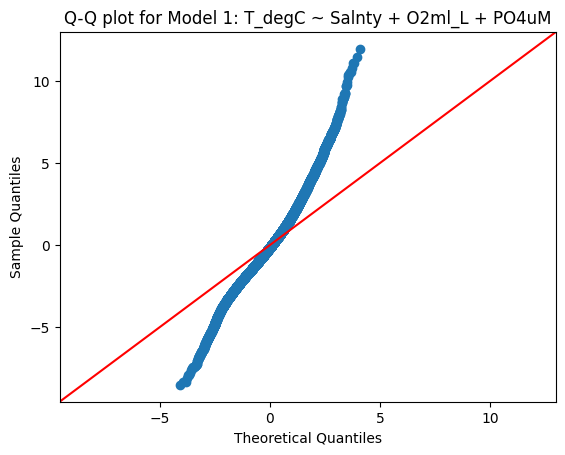

In [45]:
print("\nQ-Q plot for Model 1")
qq_plot(model1, "Q-Q plot for Model 1: T_degC ~ Salnty + O2ml_L + PO4uM")


Q-Q plot for Model 2


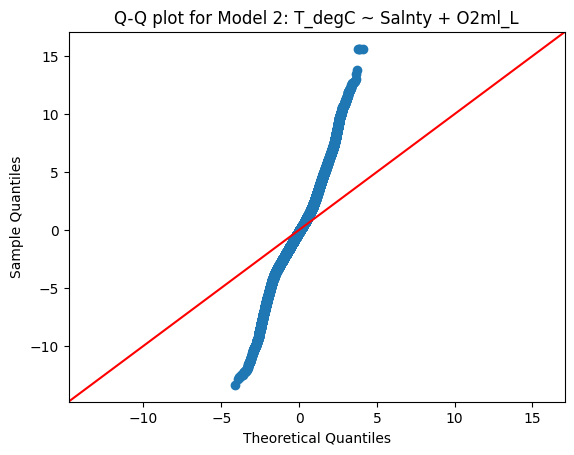

In [46]:
print("\nQ-Q plot for Model 2")
qq_plot(model2, "Q-Q plot for Model 2: T_degC ~ Salnty + O2ml_L")


Q-Q plot for Model 3


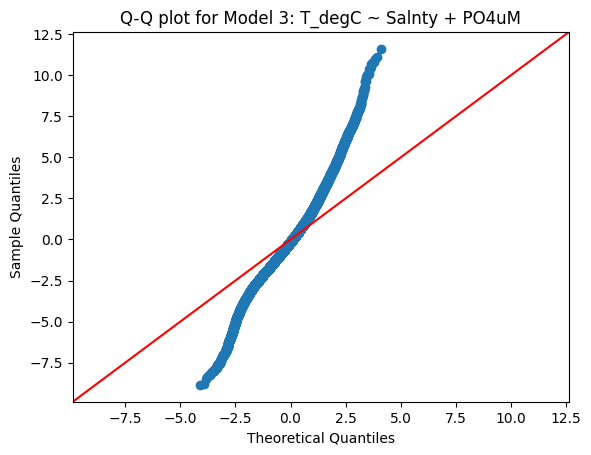

In [47]:
print("\nQ-Q plot for Model 3")
qq_plot(model3, "Q-Q plot for Model 3: T_degC ~ Salnty + PO4uM")


Q-Q plot for Model 4


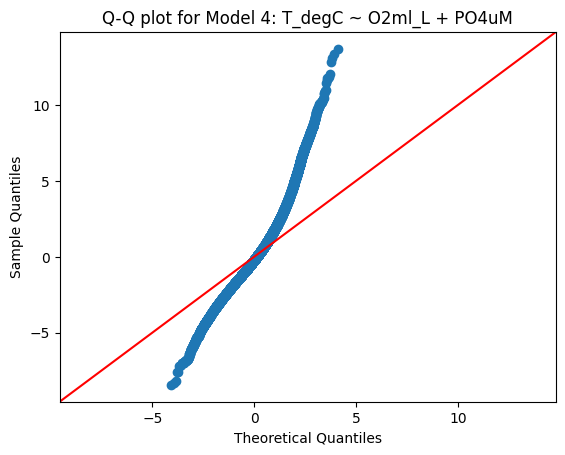

In [48]:
print("\nQ-Q plot for Model 4")
qq_plot(model4, "Q-Q plot for Model 4: T_degC ~ O2ml_L + PO4uM")

# standardized residual plots

In [49]:
def standardized_residual_plot(model, title):
    residuals = model.get_influence().resid_studentized_internal
    fitted = model.fittedvalues
    plt.scatter(fitted, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Fitted values')
    plt.ylabel('Standardized Residuals')
    plt.title(title)
    plt.show()


Standardized Residual Plot for Model 1


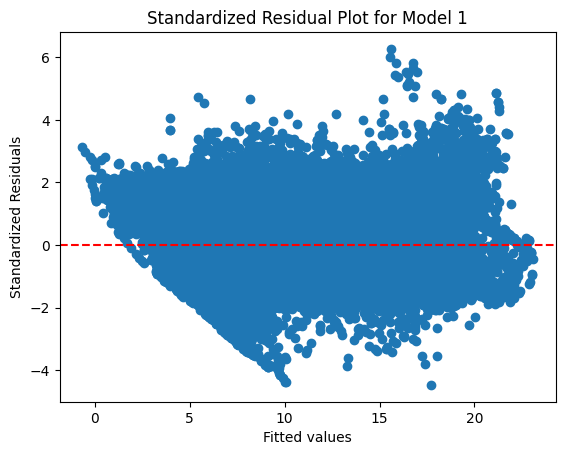

In [50]:
print("\nStandardized Residual Plot for Model 1")
standardized_residual_plot(model1, "Standardized Residual Plot for Model 1")


Standardized Residual Plot for Model 2


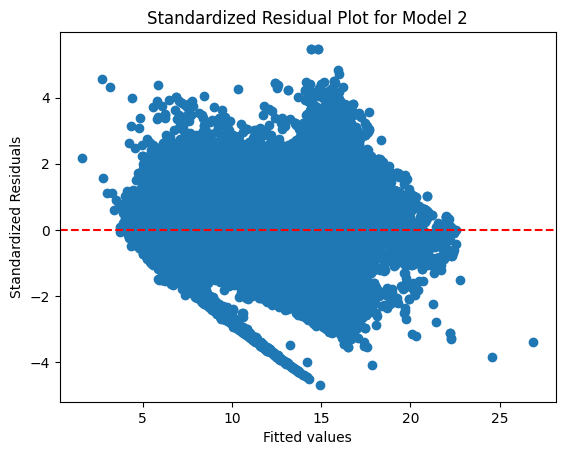

In [51]:

print("\nStandardized Residual Plot for Model 2")
standardized_residual_plot(model2, "Standardized Residual Plot for Model 2")


Standardized Residual Plot for Model 3


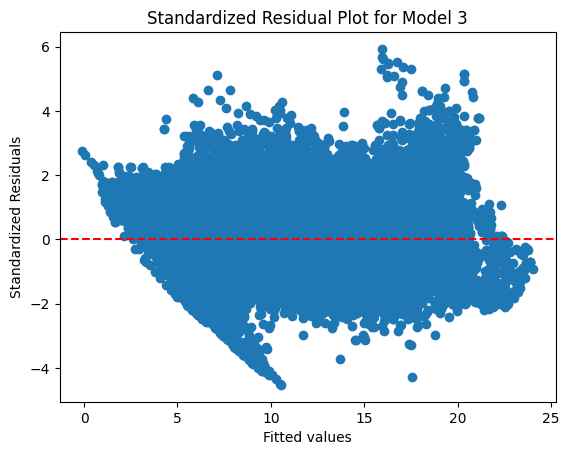

In [52]:
print("\nStandardized Residual Plot for Model 3")
standardized_residual_plot(model3, "Standardized Residual Plot for Model 3")


Standardized Residual Plot for Model 4


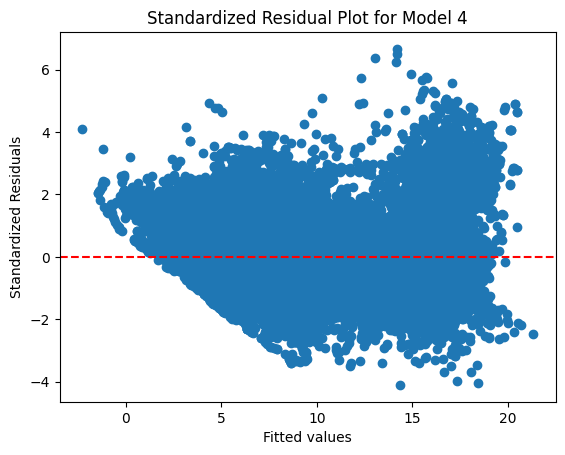

In [53]:
print("\nStandardized Residual Plot for Model 4")
standardized_residual_plot(model4, "Standardized Residual Plot for Model 4")